#**Keras – Circles dataset**

#Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings

from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

#Creación de los datos

(3000, 2)
(3000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


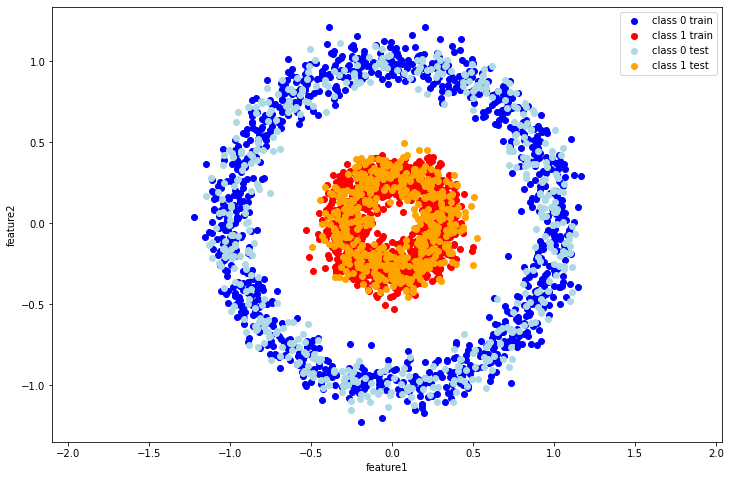

In [ ]:
seed = 7
np.random.seed(seed)

# The first way is by using the already existing functions:
X,Y = make_circles(n_samples = 3000, noise = 0.08, factor=0.3)
print(X.shape)
print(Y.shape)
print(type(X))
print(type(y))

# Spliting data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# The other way is by hand:
X0 = [X[i,:] for i in range(len(y)) if y[i] == 0] # returns the row where the corresponding label is 0
X1 = [X[i,:] for i in range(len(y)) if y[i] == 1] # returns the row where the corresponding label is 1
            
X0_np = np.array(X0) # convert it into an array
X1_np = np.array(X1) 

X0_train = X0_np[:1000,:].T # picked the first 1000 samples in the second axis
X0_test = X0_np[1000:,:].T # picked the remaining 500 samples in the second axis

X1_train = X1_np[:1000,:].T  # picked the first 1000 samples in the second axis
X1_test = X1_np[1000:,:].T # picked the remaining 500 samples in the second axis

X_train = np.hstack([X0_train,X1_train]).T # all training examples
y_train=np.zeros((1,2000))
y_train[0, 1000:] = 1

X_test = np.hstack([X0_test,X1_test]).T # all test examples
y_test=np.zeros((1,1000))
y_test[0, 500:] = 1

plt.figure(figsize=(12,8))
plt.scatter(X0_train[0,:],X0_train[1,:], color = 'b', label = 'class 0 train')
plt.scatter(X1_train[0,:],X1_train[1,:], color = 'r',  label = 'class 1 train')
plt.scatter(X0_test[0,:],X0_test[1,:], color = 'LightBlue', label = 'class 0 test')
plt.scatter(X1_test[0,:],X1_test[1,:], color = 'Orange', label = 'class 1 test')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.legend()
plt.axis('equal')
plt.show()

#Crear la red neuronal

In [ ]:
# Hyper-parameters
training_epochs = 400 # Total number of training epochs
learning_rate = 0.03 # The learning rate

# create model
def create_model():
    model = Sequential()
    # Input layer
    model.add(Dense(6, input_dim=2, kernel_initializer='normal', activation='relu'))
    # Output layer
    model.add(Dense(Y_train.T.shape[1], activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 18        
                                                                 
 dense_5 (Dense)             (None, 120)               840       
                                                                 
Total params: 858
Trainable params: 858
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.fit(
    X_train, y_train.T,
    epochs= training_epochs,
    batch_size = 516,
    validation_data = (X_test, y_test.T),
    verbose = 0
)

In [ ]:
prediction_values = (model.predict(X_test)>0.5).astype('int32')

In [ ]:
print("Test-Accuracy:","%.2f%%" % (np.mean(results.history["val_accuracy"])*100))

Test-Accuracy: 99.41%


In [ ]:
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test.T)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...
63/63 [==============================] - 0s 1ms/step - loss: 2.0750e-04 - accuracy: 1.0000
loss=0.0002, accuracy: 100.0000%
Evaluating on testing set...
32/32 [==============================] - 0s 1ms/step - loss: 3.0782e-04 - accuracy: 1.0000
loss=0.0003, accuracy: 100.0000%


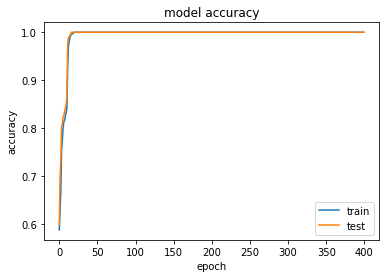

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='down right')

Maximum Loss : 0.6914

Minimum Loss : 0.0002

Loss difference : 0.6912


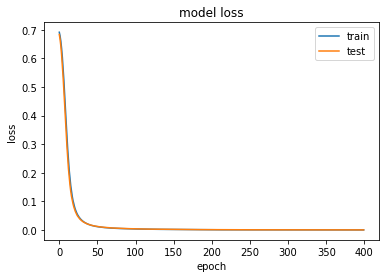

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

#Visualización

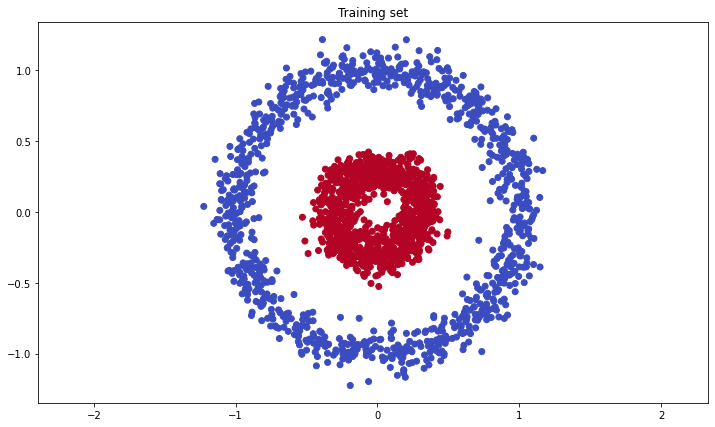

In [ ]:
plt.figure(figsize=(12,7))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train[0,:] ,cmap=cm.coolwarm)
plt.title('Training set')
plt.axis('equal');

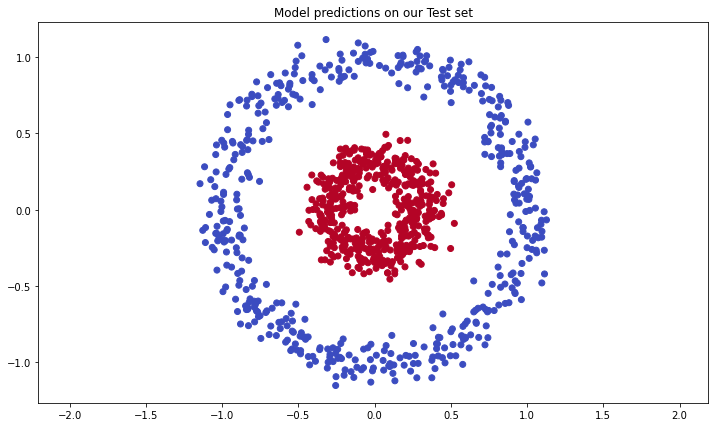

In [ ]:
plt.figure(figsize =(12,7))
plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')
plt.axis('equal');

Text(0.5, 1.0, 'Model predictions on our Test set')

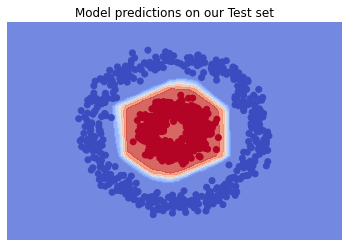

In [ ]:
xx = np.linspace(-2, 2, 40)
yy = np.linspace(-1.5, 1.5, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-2, 2])
axes.set_ylim([-1.5, 1.5])
plt.grid('off')
plt.axis('off')

plt.scatter(X_test[:,0], X_test[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Model predictions on our Test set')

#**Category of plants in iris dataset**

#Librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import warnings

from mpl_toolkits import mplot3d
from matplotlib import cm
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

#from keras.optimizers import adam
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

#Importación de datos

In [ ]:
irisdata = pd.read_csv('Iris.csv', index_col = 'Id')

print(irisdata.shape)
irisdata.head()

(150, 5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#Preprocesamiento de los datos

Dividir los datos en atributos y etiquetas

In [ ]:
X = irisdata.drop('Species', axis = 1)
Y = irisdata['Species']

Dividir los datos en training set y testing set

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [ ]:
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# Entrenamiento

In [ ]:
# create model
def create_model():
    model = Sequential()
    # Input layer
    model.add(Dense(6, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    # Output layer
    model.add(Dense(Y_train.shape[1], activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate), metrics=['accuracy'])
    return model
    
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 30        
                                                                 
 dense_9 (Dense)             (None, 3)                 21        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


# Evaluación

In [ ]:
#(x=None, y=None, batch_size=None, epochs=1, verbose='auto',
num_epochs = 50
model.fit(X_train, Y_train, epochs=num_epochs,  validation_data = (X_test, Y_test))

predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)
predictions = encoder.inverse_transform(predictions)

Y_test = np.argmax(Y_test, axis = 1)
Y_test = encoder.inverse_transform(Y_test)

predictions

print(classification_report(Y_test, predictions))

Epoch 1/50
1/4 [======>.......................] - ETA: 0s - loss: 0.0541 - accuracy: 0.9688

ValueError: ignored

#Predicciones

In [ ]:
casosPredIris = [[4.5, 2.7, 1.5, 1.0], [6.4, 4.0, 3.1, 2.1], [5.0, 2.5, 6.0, 1.5], [4.4, 4.4, 3.7, 1.4], [6.5, 4.1, 2.4, 0.2]]
casosPredIris = pd.DataFrame(casosPredIris, index=range(1,6))
casosPredIris.columns = X.columns
Predicciones = (model.predict(X_test)).astype("int32")
#casosPredIris['Predicción'] = Predicciones
#casosPredIris
Predicciones

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int32)